<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#First-look-at-the-data" data-toc-modified-id="First-look-at-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>First look at the data</a></span></li><li><span><a href="#Verification-of-enrichment-efficiency-calculations" data-toc-modified-id="Verification-of-enrichment-efficiency-calculations-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Verification of enrichment efficiency calculations</a></span></li><li><span><a href="#Analysis-of-unavailable-features" data-toc-modified-id="Analysis-of-unavailable-features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Analysis of unavailable features</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Getting-rid-of-anomalies" data-toc-modified-id="Getting-rid-of-anomalies-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Getting rid of anomalies</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Metal-concentrations-at-different-stages" data-toc-modified-id="Metal-concentrations-at-different-stages-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Metal concentrations at different stages</a></span></li><li><span><a href="#Granule-size-in-different-samples" data-toc-modified-id="Granule-size-in-different-samples-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Granule size in different samples</a></span></li><li><span><a href="#Total-metal-concentration" data-toc-modified-id="Total-metal-concentration-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Total metal concentration</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Preparing-a-test-sample" data-toc-modified-id="Preparing-a-test-sample-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preparing a test sample</a></span></li><li><span><a href="#sMAPE" data-toc-modified-id="sMAPE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>sMAPE</a></span></li><li><span><a href="#Model-training" data-toc-modified-id="Model-training-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Model training</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Desicion-Tree" data-toc-modified-id="Desicion-Tree-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Desicion Tree</a></span></li></ul></li><li><span><a href="#Best-result" data-toc-modified-id="Best-result-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Best result</a></span></li><li><span><a href="#Checking-the-adequacy-of-the-model" data-toc-modified-id="Checking-the-adequacy-of-the-model-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Checking the adequacy of the model</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Gold extraction from ore

Create a prototype of a machine learning model for 'Cifra'. The company develops solutions for the efficient operation of industrial enterprises.

The model must predict the recovery rate of gold from gold ore. Use data with extraction and purification parameters.

The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

You need:

1. Prepare data;
2. Conduct exploratory data analysis;
3. Build and train the model.

To complete the project, use the *pandas*, *matplotlib*, and *sklearn libraries.* Their documentation will help you.

## Data preparation

### First look at the data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
train=pd.read_csv('gold_industry_train.csv')
test=pd.read_csv('gold_industry_test.csv')
full=pd.read_csv('gold_industry_full.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


### Verification of enrichment efficiency calculations

In [6]:
C=train['rougher.output.concentrate_au']
F=train['rougher.input.feed_au']
T=train['rougher.output.tail_au']

train['recovery']=100*(C*(F-T))/(F*(C-T))
print ("Calculation by formula:",train['recovery'].mean())
print("Data in the training set:", train['rougher.output.recovery'].mean())

Calculation by formula: 82.52119968211336
Data in the training set: 82.52119968211336


The average values of the calculation and data in the training set are equal.

In [7]:
print(mean_absolute_error(train['recovery'], train['rougher.output.recovery']))

1.1181885454685472e-14


The average absolute error is very small, so the original data is correct. We can delete our calculations and use the ones provided.

In [8]:
train.drop('recovery', axis=1, inplace=True)

### Analysis of unavailable features

In [9]:
train_cols = train.columns
test_cols = test.columns

train_not_test = train_cols.difference(test_cols)
train_not_test

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

There are no product parameters (output) in the test sample for several reasons:
1. Product parameters are measured at the next stages, so they are not in test
2. There are no target features in this sample.

### Data preprocessing

In [10]:
datas=[train, test, full];

for data in datas:
    print(data.isna().sum().mean());

35.05747126436781
7.0754716981132075
51.50574712643678


There are not that many gaps (relative to the total amount of data), so we can fill them using the ffill method, since the project description says that the data is indexed by date and time, and parameters adjacent in time are often similar.

In [11]:
for data in datas:
    data=data.ffill(axis='rows', inplace=True)

In [12]:
for data in datas:
    print(data.isna().sum().mean());

0.0
0.0
0.0


In [13]:
for data in datas:
    print(data.duplicated().sum());

0
0
0


There are no more gaps or duplicates in the data. We can continue to work.

### Getting rid of anomalies

In [14]:
train=train.loc[train['rougher.input.feed_ag']>1]
train=train.loc[train['rougher.input.feed_pb']>1]
train=train.loc[train['rougher.input.feed_au']>1]

train=train.loc[train['rougher.output.concentrate_ag']>1]
train=train.loc[train['rougher.output.concentrate_pb']>1]
train=train.loc[train['rougher.output.concentrate_au']>1]

train=train.loc[train['primary_cleaner.output.concentrate_ag']>1]
train=train.loc[train['primary_cleaner.output.concentrate_pb']>1]
train=train.loc[train['primary_cleaner.output.concentrate_au']>1]

train=train.loc[train['final.output.concentrate_ag']>1]
train=train.loc[train['final.output.concentrate_pb']>1]
train=train.loc[train['final.output.concentrate_au']>1]

Based on the graphs of total concentrations, I decided to delete rows where the concentration values are less than one. These are anomalies and they could appear from errors or a failure, so the rest of the signs of these lines may also be incorrect.

### Conclusion

1. We have studied the data provided.
2. We made sure that the enrichment efficiency corresponded to reality by comparing it with our own calculations.
3. Gaps in the data have been removed.
4. Data anomalies were removed.

## Data analysis

### Metal concentrations at different stages

In [15]:
concentrate_ag = train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag',\
                        'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
concentrate_pb = train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb',\
                        'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
concentrate_au = train[['rougher.input.feed_au', 'rougher.output.concentrate_au',\
                        'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]

In [16]:
concentrate_ag = concentrate_ag.rename(columns={'rougher.input.feed_ag':'Сырье',
                                                'rougher.output.concentrate_ag': 'Черновой конц.',
                                                'primary_cleaner.output.concentrate_ag': 'Перв. очистка',
                                                'final.output.concentrate_ag': 'Финал. конц.'})

concentrate_pb = concentrate_pb.rename(columns={'rougher.input.feed_pb':'Сырье',\
                                                'rougher.output.concentrate_pb': 'Черновой конц.', \
                                'primary_cleaner.output.concentrate_pb': 'Перв. очистка',\
                              'final.output.concentrate_pb': 'Финал. конц.'})

concentrate_au = concentrate_au.rename(columns={'rougher.input.feed_au':'Сырье',\
                                                'rougher.output.concentrate_au': 'Черновой конц.', \
                                'primary_cleaner.output.concentrate_au': 'Перв. очистка',\
                              'final.output.concentrate_au': 'Финал. конц.'})

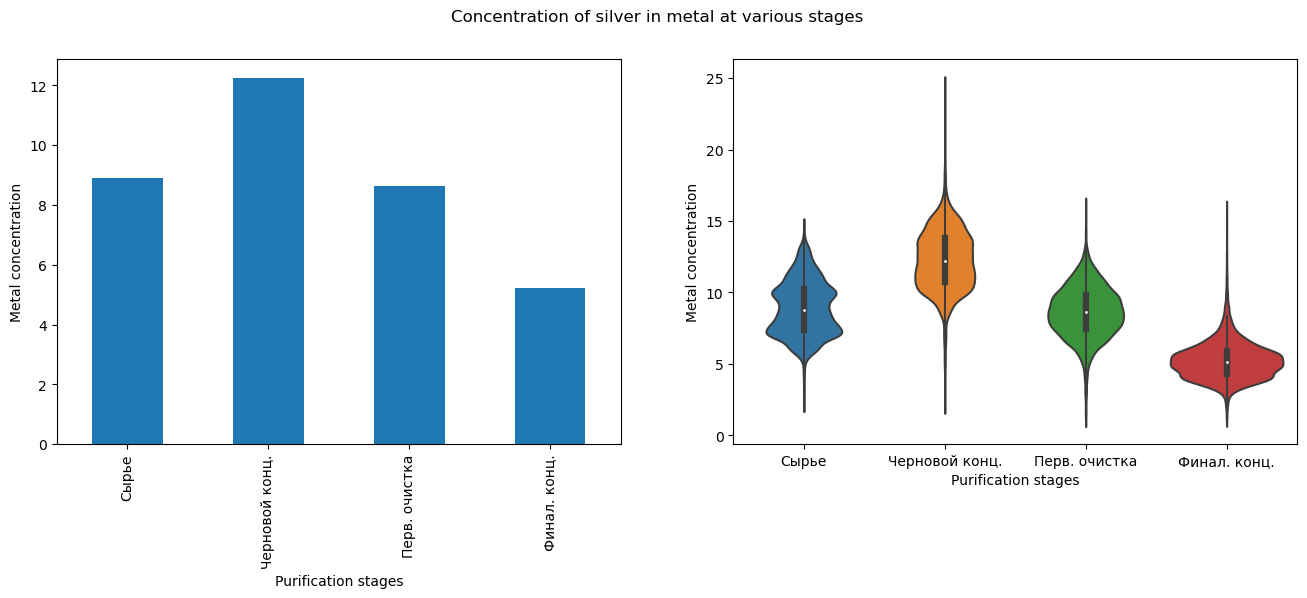

In [17]:
figure1, (plot1, plot2)=plt.subplots(1, 2, linewidth=2, figsize=(16, 5))

concentrate_ag.mean().plot(ax=plot1, kind='bar')
sns.violinplot(ax=plot2, data=concentrate_ag)
plt.suptitle('Concentration of silver in metal at various stages')
plot1.set_ylabel('Metal concentration')
plot1.set_xlabel('Purification stages')
plot2.set_ylabel('Metal concentration')
plot2.set_xlabel('Purification stages')
plt.show()

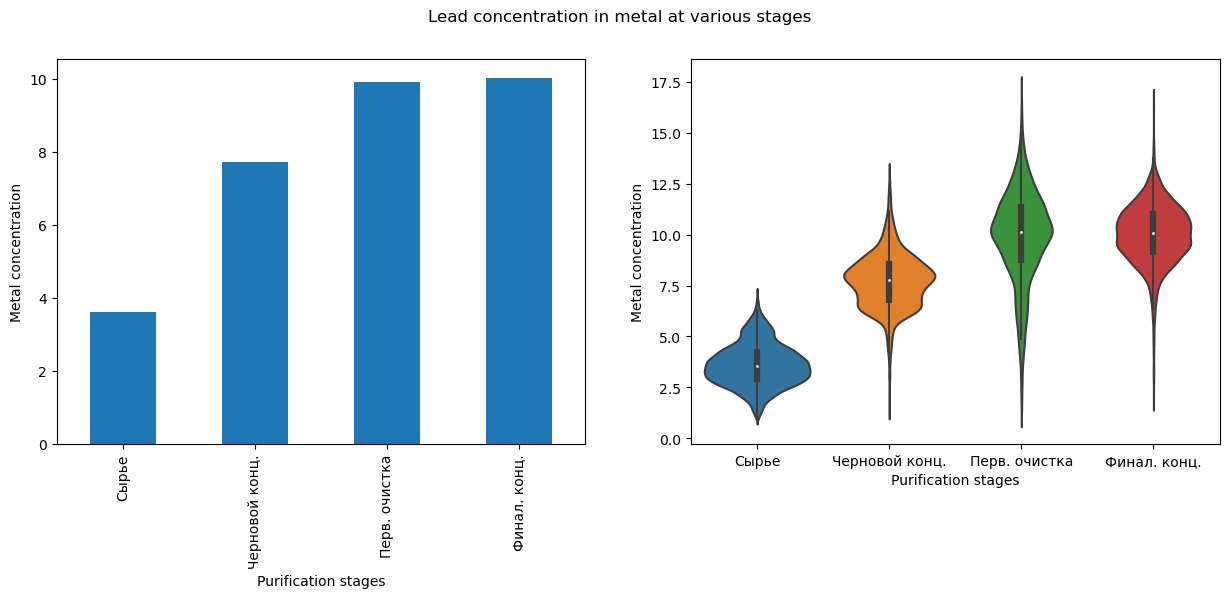

In [18]:
figure2, (plot3, plot4)=plt.subplots(1, 2, linewidth=2, figsize=(15, 5))

concentrate_pb.mean().plot(ax=plot3, kind='bar')
sns.violinplot(ax=plot4, data=concentrate_pb)
plt.suptitle('Lead concentration in metal at various stages')
plot3.set_ylabel('Metal concentration')
plot3.set_xlabel('Purification stages')
plot4.set_ylabel('Metal concentration')
plot4.set_xlabel('Purification stages')
plt.show()

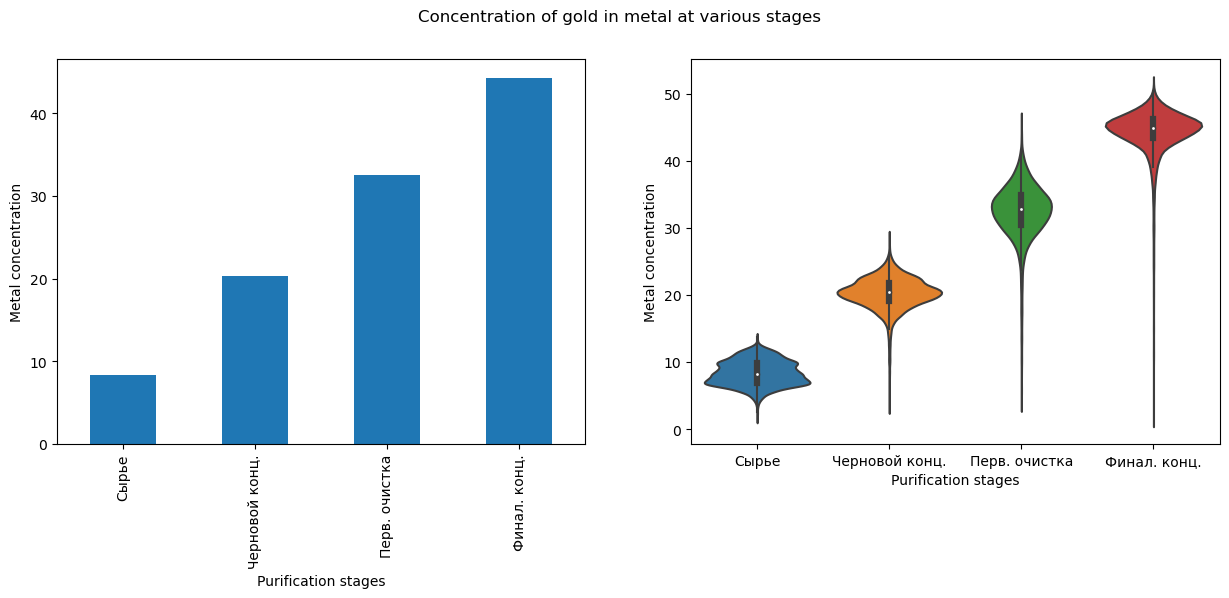

In [19]:
figure3, (plot5, plot6)=plt.subplots(1, 2, linewidth=2, figsize=(15, 5))

concentrate_au.mean().plot(ax=plot5, kind='bar')
sns.violinplot(ax=plot6, data=concentrate_au)
plt.suptitle('Concentration of gold in metal at various stages')
plot5.set_ylabel('Metal concentration')
plot5.set_xlabel('Purification stages')
plot6.set_ylabel('Metal concentration')
plot6.set_xlabel('Purification stages')
plt.show()

Silver: the concentration increases in the second stage, decreasing by 2 times towards the end.
Lead: increases 2.5 times by the 3rd stage, at the last stage it practically does not change.
Gold: increases at all stages, increases 4 times.

### Granule size in different samples

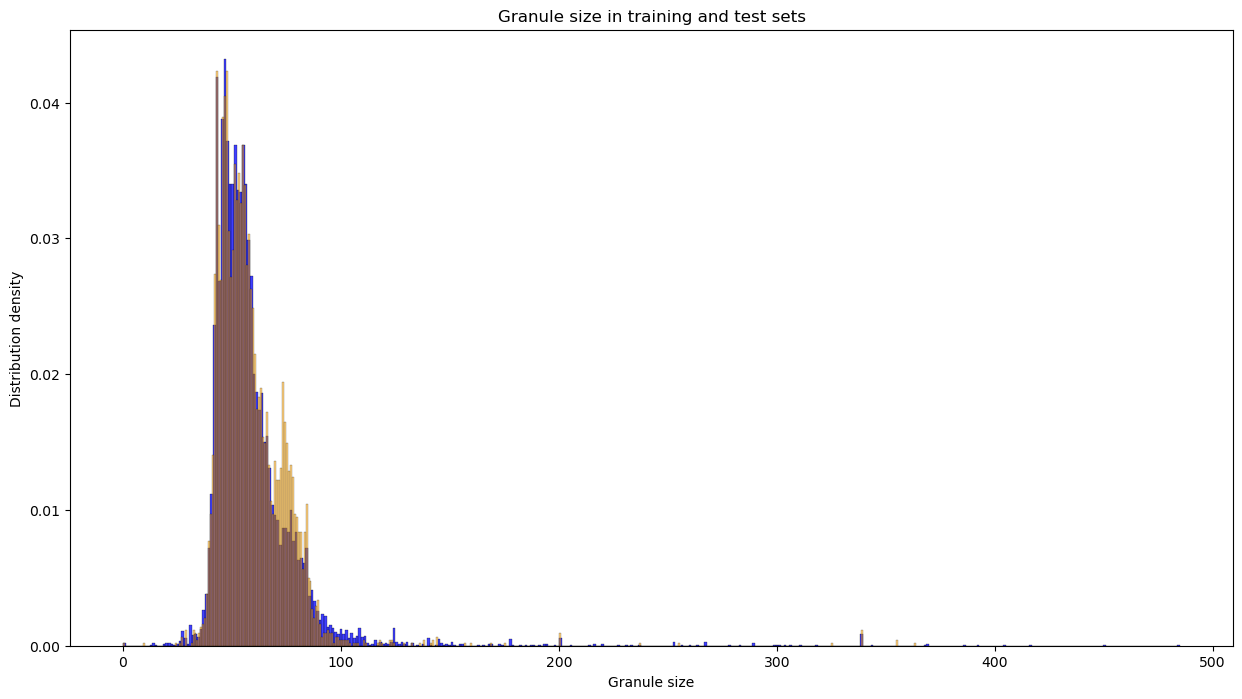

In [20]:
plt.subplots(figsize = (15, 8))
sns.histplot(train['rougher.input.feed_size'], stat='density', color='blue', bins=400)
sns.histplot(test['rougher.input.feed_size'], stat='density', color='orange', alpha=0.5, bins=400)
plt.title('Granule size in training and test sets')
plt.xlabel('Granule size')
plt.ylabel('Distribution density')
plt.show()

In [21]:
train['rougher.input.feed_size'].describe()

count    13748.000000
mean        59.079249
std         23.195297
min          0.049194
25%         47.282824
50%         54.464761
75%         64.236595
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [22]:
test['rougher.input.feed_size'].describe()

count    4860.000000
mean       59.136150
std        19.512497
min         0.046369
25%        47.610795
50%        55.461058
75%        66.538910
max       363.989699
Name: rougher.input.feed_size, dtype: float64

The average granule size differs by 0.003 microns. The range diagram indicators (median, lower and upper quantile) are also very close.

### Total metal concentration

In [23]:
combined_input = train[['rougher.input.feed_ag', 'rougher.input.feed_pb',\
                 'rougher.input.feed_sol', 'rougher.input.feed_au']].sum(axis=1)

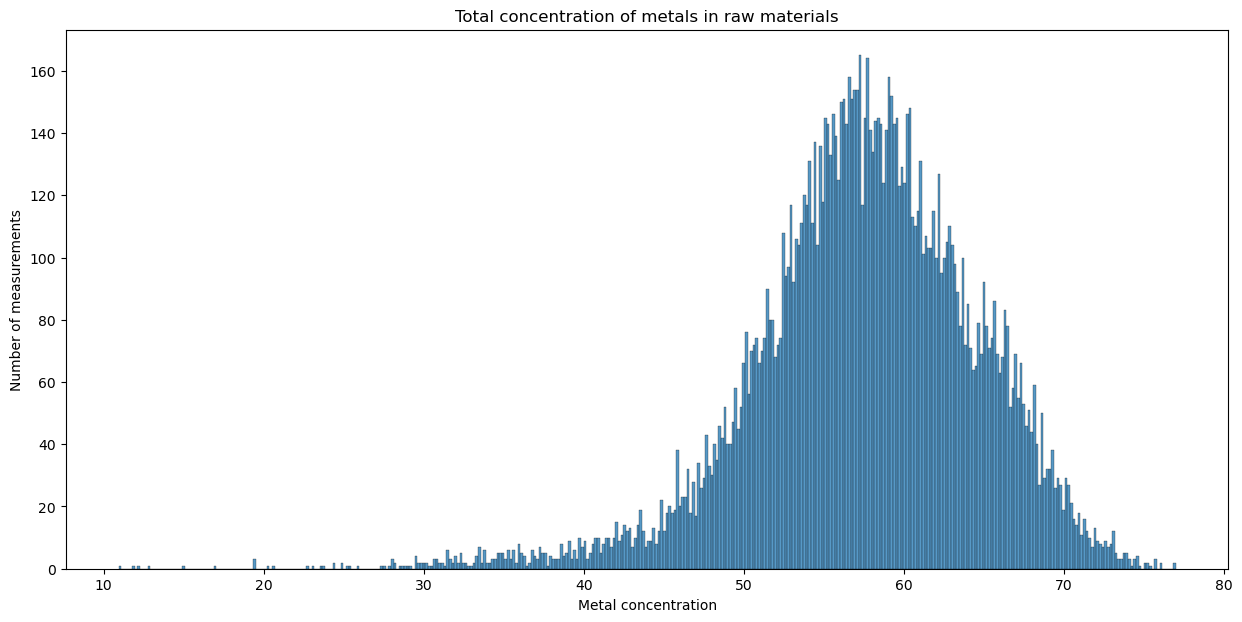

In [24]:
plt.subplots(figsize = (15, 7))
sns.histplot(combined_input, bins=400)
plt.title('Total concentration of metals in raw materials')
plt.xlabel('Metal concentration')
plt.ylabel('Number of measurements')
plt.show()

In [25]:
combined_output = train[['rougher.output.concentrate_pb', 'rougher.output.concentrate_ag',\
                        'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum(axis=1)

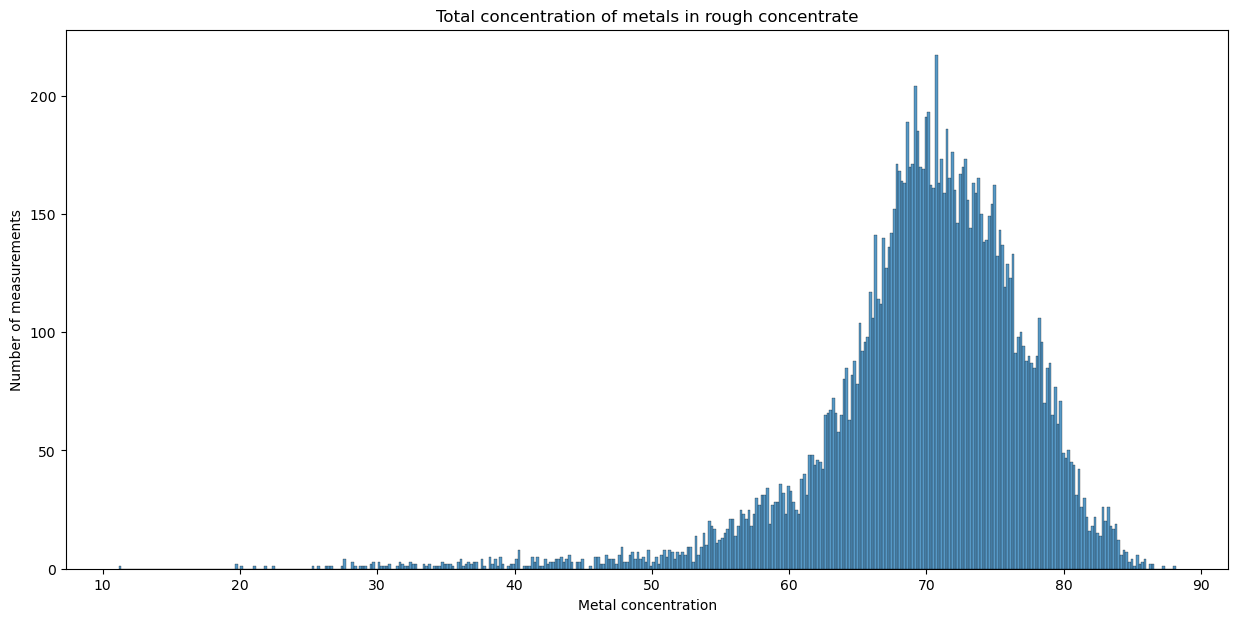

In [26]:
plt.subplots(figsize = (15, 7))
sns.histplot(combined_output, bins=400)
plt.title('Total concentration of metals in rough concentrate')
plt.xlabel('Metal concentration')
plt.ylabel('Number of measurements')
plt.show()

In [27]:
combined_cleaner = train[['primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_ag',\
                       'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au']].sum(axis=1)

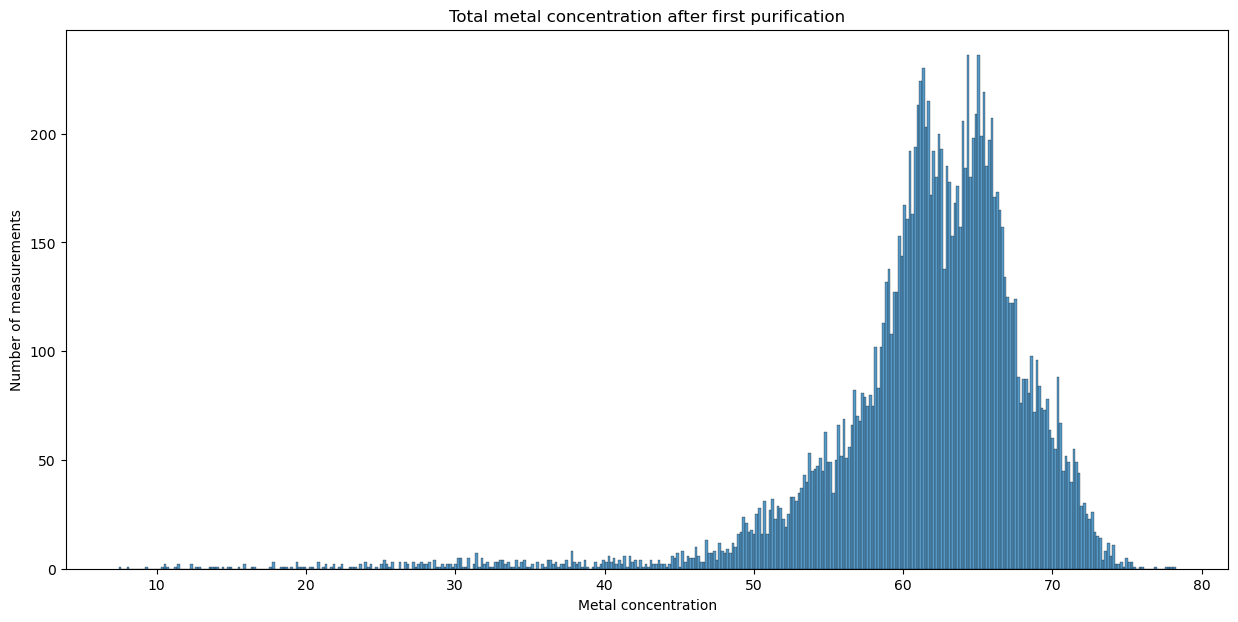

In [28]:
plt.subplots(figsize = (15, 7))
sns.histplot(combined_cleaner, bins=400)
plt.title('Total metal concentration after first purification')
plt.xlabel('Metal concentration')
plt.ylabel('Number of measurements')
plt.show()

In [29]:
combined_final = train[['final.output.concentrate_pb', 'final.output.concentrate_ag',\
                       'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1)

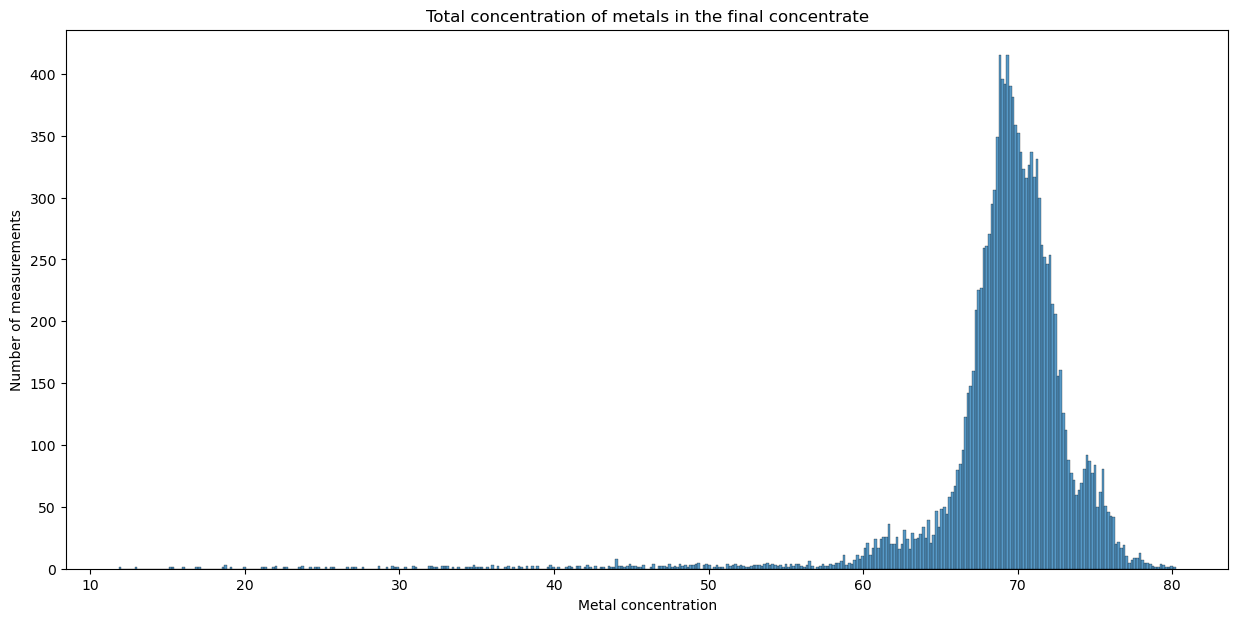

In [30]:
plt.subplots(figsize = (15, 7))
sns.histplot(combined_final, bins=400)
plt.title('Total concentration of metals in the final concentrate')
plt.xlabel('Metal concentration')
plt.ylabel('Number of measurements')
plt.show()

The total concentration of metals increases in the first two stages, decreasing in the third. This explains the decrease in silver content that we saw in paragraph 2.1. At the fourth stage, the concentration increases again, the graph has a normal distribution.

### Conclusion
1. We analyzed the concentrations of metals in the raw materials. The gold and lead content increases at all stages, while the silver content decreases.
2. The sizes of granules in the training and test samples are practically the same, which indicates the high quality of the data provided and allows you to create high-quality models.
3. Thanks to the work carried out at stage 1.5, the graphs of total metal concentrations have a normal distribution and there are no anomalies.

## Models

### Preparing a test sample

In [31]:
data_target = full[['date', 'rougher.output.recovery', 'final.output.recovery']]
test = test.merge(data_target, how = 'left', on = 'date')
test.drop(['date'], axis=1, inplace=True)
train = train.drop(set(train.columns)-set(test.columns), axis=1)

Since the test sample does not have the necessary parameters, we will add them from full

### sMAPE

In [32]:
def smape_total(target_rougher, predicted_rougher, target_final, predicted_final):
    return (0.25*smape(target_rougher, predicted_rougher)) + (0.75*smape(target_final, predicted_final))

def smape(target, predicted):
    return 1/len(target) * np.sum(2 * np.abs(
       target - predicted) / (np.abs(target) + np.abs(predicted))*100)

def smape_final(sMAPE_rougher, sMAPE_final):
    return 0.25*sMAPE_rougher + 0.75*sMAPE_final

In [33]:
features_train_rougher = train.drop(['rougher.output.recovery'], axis=1)
target_train_rougher = train['rougher.output.recovery']

features_train_final = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_final = train['final.output.recovery']

features_test_rougher = test.drop(['rougher.output.recovery'], axis=1)
target_test_rougher = test['rougher.output.recovery']

features_test_final = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_final = test['final.output.recovery']

### Model training

#### Linear Regression

In [34]:
model = LinearRegression()
scorer = make_scorer(smape, greater_is_better=False)
rougher_linear = cross_val_score(model, features_train_rougher, target_train_rougher, scoring=scorer)
final_linear =  cross_val_score(model, features_train_final, target_train_final, scoring=scorer)
print('Итоговое sMape для линейной регрессии:', -smape_final(rougher_linear, final_linear).mean())

Итоговое sMape для линейной регрессии: 8.570663568436034


#### Desicion Tree

In [35]:
best_depth=0
best_result=100
best_split=2;
best_split_result=100

for depth in range(1, 6):
    for split in range(2, 10, 2):
        model = DecisionTreeRegressor(random_state=12345, max_depth = depth, min_samples_split=split)
        scorer = make_scorer(smape, greater_is_better=False)
        rougher_tree = cross_val_score(model, features_train_rougher, target_train_rougher, scoring=scorer)
        final_tree = cross_val_score(model, features_train_final, target_train_final, scoring=scorer)
        if (-smape_final(rougher_tree, final_tree).mean()<best_result):
            best_result=-smape_final(rougher_tree, final_tree).mean()
            best_depth=depth
            best_split=split
        
print('Итоговое sMAPE для решающего дерева:', best_result)
print('Глубина:', best_depth)
print('min_samples_split:', best_split)

Итоговое sMAPE для решающего дерева: 8.153924268371169
Глубина: 2
min_samples_split: 2


### Best result

In [36]:
model_rougher = DecisionTreeRegressor(random_state=12345, max_depth = best_depth, min_samples_split=best_split)
model_final = DecisionTreeRegressor(random_state=12345, max_depth = best_depth, min_samples_split=best_split)
model_rougher.fit(features_train_rougher, target_train_rougher)
model_final.fit(features_train_final, target_train_final)
test_predictions_rougher = model_rougher.predict(features_test_rougher)
test_predictions_final = model_final.predict(features_test_final)
print('Итоговое sMAPE на тестовой выборке:',smape_total(
    target_test_rougher, test_predictions_rougher, target_test_final, test_predictions_final).mean())

Итоговое sMAPE на тестовой выборке: 7.71661798341127


### Checking the adequacy of the model

In [37]:
dummy_model_r = DummyRegressor(strategy="mean")
dummy_model_f = DummyRegressor(strategy="mean")
dummy_model_r.fit(features_train_rougher, target_train_rougher)
dummy_model_f.fit(features_train_final, target_train_final)
test_predictions_rougher = dummy_model_r.predict(features_test_rougher)
test_predictions_final = dummy_model_f.predict(features_test_final)

print('Final sMAPE для DummyRegressor:',smape_total(
    target_test_rougher, test_predictions_rougher, target_test_final, test_predictions_final).mean())

Final sMAPE для DummyRegressor: 8.456633970072676


### Conclusion

1. A test sample has been prepared.
2. The sMAPE function has been created.
3. Linear regression and decision tree models were trained. To improve the latter, hyperparameters were selected.
4. The decision tree model with depth 2 showed the best results. On the test sample, we obtained an sMAPE value of **7.717**, which is less than that of the base model. This means that the resulting model is adequate.

## Conclusion
At the data preparation stage, the correctness of the provided data was checked, differences in the sizes of the test and training samples were detected, anomalous values were removed and gaps were filled.

When analyzing the data, we visualized both the concentrations of individual metals at 4 stages (raw materials, rough concentrate, after the first purification, final concentrate), and the total shares. After analyzing the sizes of granules in two samples, we came to the conclusion that the data provided was of good quality and the model could be trained on its basis.

Two different models were trained, hyperparameters were selected for improvement, and the sMAPE function was created. As a result, we obtained an adequate model with a symmetrical average absolute percentage deviation of **7.717**